# Dataset

In [1]:
!wget https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv

--2023-01-03 19:19:34--  https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4649304 (4.4M) [text/plain]
Saving to: ‘re8.csv’

re8.csv             100%[===================>]   4.43M  --.-KB/s    in 0.08s   

2023-01-03 19:19:34 (58.4 MB/s) - ‘re8.csv’ saved [4649304/4649304]



In [3]:
!pip install git+https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git to /tmp/pip-req-build-jllwqozf
  Running command git clone --filter=blob:none --quiet https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git /tmp/pip-req-build-jllwqozf
  Resolved https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git to commit 533e8a031cc212bb31e803f46613e395b3690d8b
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/AlvaroJoseLopes/graph-walker to /tmp/pip-install-8jv8fumi/graph-walker_9f8fc64c465941a3a5577b56abdb0961
  Running command git clone --filter=blob:none --quiet https://github.com/AlvaroJoseLopes/graph-walker /tmp/pip-install-8jv8fumi/graph-walker_9f8fc64c465941a3a5577b56abdb0961
  Resolved https://github.com/AlvaroJoseLopes/graph-walker to commit b8710bc3bb4daa8212fef1d9c12a1451e5dd56c6
  Installing build dependencies ... done
  Getting requirements to bui

In [5]:
import pandas as pd 

df = pd.read_csv('re8.csv')
df

,file_name,text,class
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq
4,acq.6302.txt,cooper canada said it received takeover offers...,acq
...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade


In [6]:
df['label'] = df['class'].astype('category').cat.codes
df

,file_name,text,class,label
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq,0
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq,0
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq,0
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq,0
4,acq.6302.txt,cooper canada said it received takeover offers...,acq,0
...,...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade,7
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade,7
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade,7
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade,7


In [7]:
df = df.sample(frac=1).reset_index(drop=True)
df

,file_name,text,class,label
0,grain.1279.txt,argentine grain belt weather report argentine ...,grain,3
1,earn.5114.txt,transit financial holdings inc th qtr net shr ...,earn,2
2,trade.7900.txt,white house discounts threat of trade war pres...,trade,7
3,grain.4476.txt,cbt discusses major changes for renovation chi...,grain,3
4,earn.1338.txt,northern trust corp ntrs st qtr net shr cts vs...,earn,2
...,...,...,...,...
7669,crude.3109.txt,coastal cgp raises oil posted prices coastal c...,crude,1
7670,acq.3914.txt,orange co oj holder raises stake orange co inc...,acq,0
7671,earn.1496.txt,merrill lynch and co mer st qtr net shr primar...,earn,2
7672,earn.6802.txt,microdyme corp mcdy st qtr feb one loss shr lo...,earn,2


In [8]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 94.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=8aaa09cd49436493749bbabd5139421270c578ec12cfb2e1503c0ffb551166f5
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [9]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


embeddings = model.encode(df.text.to_list())


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [10]:
df['embeddings'] = list(embeddings)
df

,file_name,text,class,label,embeddings
0,grain.1279.txt,argentine grain belt weather report argentine ...,grain,3,"[0.17997181, -0.25163648, 0.23990995, 0.159170..."
1,earn.5114.txt,transit financial holdings inc th qtr net shr ...,earn,2,"[-0.1323317, -0.7577547, 0.20862465, -0.084043..."
2,trade.7900.txt,white house discounts threat of trade war pres...,trade,7,"[-0.55397767, -0.016774647, 0.03734675, -0.150..."
3,grain.4476.txt,cbt discusses major changes for renovation chi...,grain,3,"[-0.3139543, -0.045404345, 0.2729277, -0.18293..."
4,earn.1338.txt,northern trust corp ntrs st qtr net shr cts vs...,earn,2,"[0.07728319, -0.4537972, -0.009032063, -0.1370..."
...,...,...,...,...,...
7669,crude.3109.txt,coastal cgp raises oil posted prices coastal c...,crude,1,"[-0.4182914, -0.06769361, -0.058734722, 0.0393..."
7670,acq.3914.txt,orange co oj holder raises stake orange co inc...,acq,0,"[-0.12458563, -0.72651833, -0.46441028, 0.2317..."
7671,earn.1496.txt,merrill lynch and co mer st qtr net shr primar...,earn,2,"[-0.15205108, -0.45795757, -0.12537935, -0.150..."
7672,earn.6802.txt,microdyme corp mcdy st qtr feb one loss shr lo...,earn,2,"[-0.4580024, -0.33052802, 0.26323798, -0.04228..."


# Construindo o Grafo

In [11]:
from sklearn.neighbors import kneighbors_graph
import numpy as np
A = kneighbors_graph(np.array(df['embeddings'].to_list()), n_neighbors=5, metric="cosine")

In [12]:
import networkx as nx 
G = nx.Graph(A)

In [13]:
G.number_of_nodes()

7674

# Utilizando a API

In [14]:
num_walks = 50
walk_len = 10
embed_dim = 32
mask_rate = 0.5
starting_nodes = None
batch_size = 128
epochs = 5
lr = 0.0001

In [15]:
from deep_walk_transformers.deep_walk_transformers import DeepWalkTransformers
dwt = DeepWalkTransformers(
    num_walks,
    walk_len,
    mask_rate,
    embed_dim
)
dwt.fit(G, starting_nodes, batch_size, epochs, lr)

/usr/local/lib/python3.8/dist-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Random walks - T=0.22s
Walks shape: (383700, 10)


Building X_paths and X_positions:   0%|          | 0/383700 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
Getting masked input (mask token id = 7676) ...
Building Masked Language Bert Model ...
Fake Training MLM model ... 
Epoch 1/5
eh pra entrar aqui!!!
eh pra entrar aqui!!!
2998/2998 [==============================] - 30s 9ms/step - loss: 8.9078
Epoch 2/5
2998/2998 [==============================] - 27s 9ms/step - loss: 8.8505
Epoch 3/5
2998/2998 [==============================] - 27s 9ms/step - loss: 8.8247
Epoch 4/5
2998/2998 [==============================] - 27s 9ms/step - loss: 8.8052
Epoch 5/5
2998/2998 [==============================] - 27s 9ms/step - loss: 8.7831


In [16]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

def evaluate(df_embed, labels):
    # avaliando com clustering
    # kmeans = KMeans(n_clusters=len(np.unique(labels)), random_state=0).fit(df_emb_train)
    # kmeans.labels_
    # print('---> DeepWalk Transformers (clustering): ', normalized_mutual_info_score(kmeans.labels_, labels))

    # avaliando com classificacao
    print("\n\n\n---> DeepWalk Transformers (classification)")
    clf_train, clf_test, clf_train_y, clf_test_y  = train_test_split(df_embed, labels, test_size=0.3, random_state=42)
    clf = LinearSVC()
    clf.fit(clf_train, clf_train_y)
    print(classification_report(clf_test_y, clf.predict(clf_test)))

In [17]:
node_embeddings = dwt.get_transductive_embeddings()
df_embed = pd.DataFrame.from_dict(node_embeddings, orient='index')

11991/11991 [==============================] - 31s 3ms/step


In [18]:
df_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.085876,-0.583815,-0.752408,-0.916196,0.000606,1.051767,-0.183078,0.803695,-1.355667,1.363194,...,-1.407253,1.271708,-1.232149,0.884009,-1.251779,1.000959,-0.995528,1.199619,-0.904529,1.277153
1,-2.341234,-0.674715,-0.891353,-3.222685,2.304372,-1.442878,0.930910,0.714565,-0.559999,0.545256,...,-0.920114,1.455609,-0.867477,2.569867,-0.823803,1.363995,-1.414317,1.600976,-1.749792,0.399417
2,-0.488640,-1.628326,-0.663250,-1.315338,1.045697,0.395712,0.326645,1.170981,-1.436177,1.250464,...,-1.340358,1.173130,-1.085109,1.490812,-1.196468,1.668916,-1.248183,0.941423,-1.303721,1.406561
3,-1.173257,-1.134562,-0.781456,-2.149004,1.519218,-0.462438,0.518022,0.904635,-1.043481,0.876521,...,-1.094812,1.418296,-1.059366,1.950908,-1.014111,1.433247,-1.281801,1.271637,-1.418672,0.959118
4,-1.798857,-1.344913,-0.728209,-2.636455,2.170236,-0.973316,0.837642,0.959088,-0.961252,0.730202,...,-0.932970,1.407210,-1.002981,2.305344,-0.937779,1.634621,-1.363257,1.411959,-1.737681,0.761076


In [19]:
df_embed.shape

(7674, 32)

In [20]:
evaluate(df_embed, df.label.to_list())




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.51      0.60      0.55       670
           1       0.21      0.03      0.05       114
           2       0.66      0.80      0.72      1188
           3       0.00      0.00      0.00        19
           4       0.50      0.10      0.16        73
           5       0.29      0.02      0.04        86
           6       1.00      0.04      0.08        46
           7       0.17      0.04      0.06       107

    accuracy                           0.60      2303
   macro avg       0.42      0.20      0.21      2303
weighted avg       0.55      0.60      0.55      2303



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

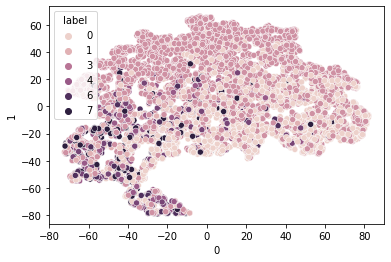

In [21]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = df.label.to_list()
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")